In [21]:
import numpy as np
import scipy
from scipy.io import wavfile
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

from scipy.stats import entropy
import seaborn as sns
from sklearn.metrics import r2_score

In [18]:
[rate1, s1] = scipy.io.wavfile.read('OSR_us_000_0010_8k.wav')
[rate2, s2] = scipy.io.wavfile.read('male.wav')

s2 = s2[:s1.shape[0]]

s2 = s2/np.max(s2) * np.max(s1)

In [2]:
# Load two audio files (assuming they have the same length and sample rate)
sample_rate_1, audio_1 = wavfile.read('Presentation/mixed_1.wav')
sample_rate_2, audio_2 = wavfile.read('Presentation/mixed_2.wav')

In [3]:
# Ensure both audio samples have the same sample rate
assert sample_rate_1 == sample_rate_2, "Sample rates of the two audio files must be the same"
sample_rate = sample_rate_1

# Truncate to the same length if necessary
min_len = min(len(audio_1), len(audio_2))
audio_1 = audio_1[:min_len]
audio_2 = audio_2[:min_len]

# Stack both audio samples as two rows in a single numpy array (for mixing)
X = np.c_[audio_1, audio_2].astype(float)

In [9]:
# Apply FastICA to perform blind source separation
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstructed signals (separated sources)
A_ = ica.mixing_  # Estimated mixing matrix

# Save separated signals as WAV files
wavfile.write('separated_source1.wav', sample_rate, S_[:, 0].astype(np.int16))
wavfile.write('separated_source2.wav', sample_rate, S_[:, 1].astype(np.int16))


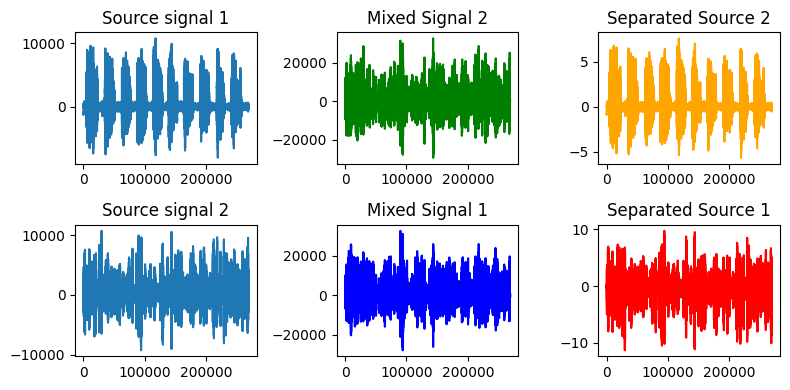

In [19]:
plt.figure(figsize=(8, 4))

plt.subplot(2,3,1)
plt.plot(s1)
plt.title("Source signal 1")

plt.subplot(2,3,2)
plt.plot(audio_2, color='green')
plt.title("Mixed Signal 2")

plt.subplot(2,3,3)
plt.plot(S_[:, 1], color='orange')
plt.title("Separated Source 2")

plt.subplot(2,3,4)
plt.plot(s2)
plt.title("Source signal 2")

plt.subplot(2,3,5)
plt.plot(audio_1, color='blue')
plt.title("Mixed Signal 1")

plt.subplot(2,3,6)
plt.plot(S_[:, 0], color='red')
plt.title("Separated Source 1")

plt.tight_layout()

In [17]:
def entropy_calculator (signal, n_bins):
    hist, bin_edges = np.histogram(signal, bins=n_bins, density=True)
    probability_distribution = hist * np.diff(bin_edges)
    signal_entropy = entropy(probability_distribution)
    return signal_entropy

difference of entropies is: 0.010933401362052342
difference of entropies is: 0.3210126747488964
difference of entropies is: 0.37129061624017634
difference of entropies is: 0.40573012724662405
difference of entropies is: 0.42266549676824816
difference of entropies is: 0.420106590989878
difference of entropies is: 0.4302335385728995
difference of entropies is: 0.4333937082992474
difference of entropies is: 0.4550663787212521


Text(0, 0.5, '$\\Delta$ Entropy')

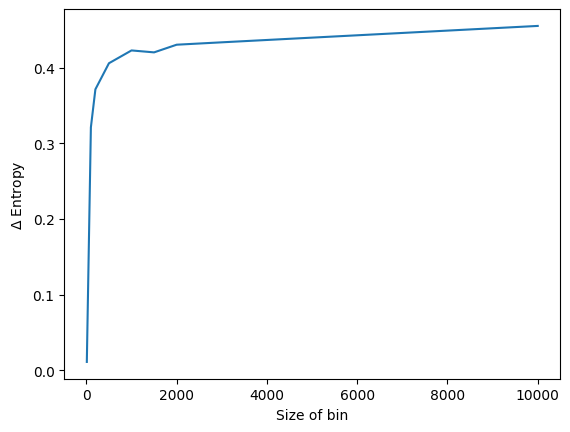

In [22]:
signals = [s1, s2, audio_1, audio_2]
entropies = []
delta_s = []

bin_size = [10, 100, 200, 500, 1000, 1500, 2000, 3000, 10000]
for bin_s in bin_size:
    entropies = []
    for signal in signals:
        entropies.append(entropy_calculator(signal, bin_s))
    print("difference of entropies is:",  entropies[2] + entropies[3] - (entropies[0] + entropies[1]))
    delta_s.append(entropies[2] + entropies[3] - (entropies[0] + entropies[1]))

plt.plot(bin_size, delta_s)
plt.xlabel("Size of bin")
plt.ylabel("$\Delta$ Entropy")

difference of entropies is: -0.010947779580734451
difference of entropies is: -0.3224591971781532
difference of entropies is: -0.37113853972575583
difference of entropies is: -0.40491814285856265
difference of entropies is: -0.4231893249544889
difference of entropies is: -0.4243709987079054
difference of entropies is: -0.42529612235406944
difference of entropies is: -0.43315219348520806
difference of entropies is: -0.43655036333127484


Text(0, 0.5, '$\\Delta$ Entropy')

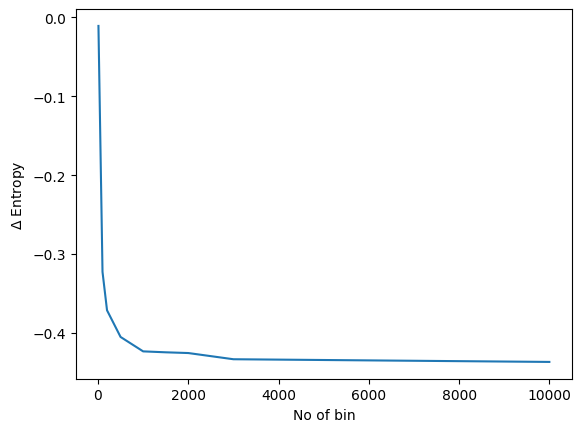

In [23]:
signals = [audio_1, audio_2, S_[:, 0], S_[:, 1]]
entropies = []
delta_s = []

bin_size = [10, 100, 200, 500, 1000, 1500, 2000, 3000, 10000]
for bin_s in bin_size:
    entropies = []
    for signal in signals:
        entropies.append(entropy_calculator(signal, bin_s))
    print("difference of entropies is:",  entropies[2] + entropies[3] - (entropies[0] + entropies[1]))
    delta_s.append(entropies[2] + entropies[3] - (entropies[0] + entropies[1]))

plt.plot(bin_size, delta_s)
plt.xlabel("No of bin")
plt.ylabel("$\Delta$ Entropy")

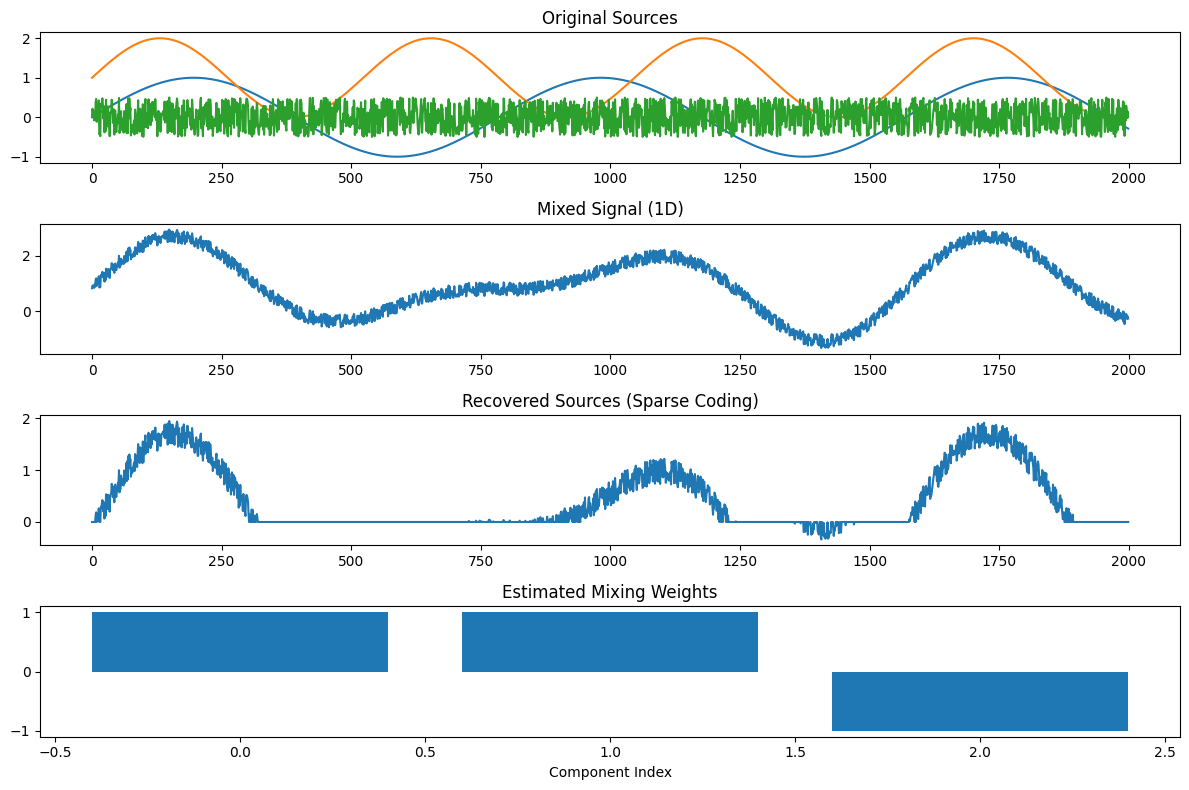

In [16]:
import numpy as np
from sklearn.decomposition import DictionaryLearning
import matplotlib.pyplot as plt

# Generate synthetic data: 1 mixture, 3 sparse components
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Define 3 sparse independent sources
s1 = np.sin(2 * time)  # Sinusoidal signal
# s2 = np.sign(np.sin(3 * time))  # Square wave
s2 = np.sin(3 * time) + 1
s3 = np.random.rand(n_samples) - 0.5  # Random noise (sparse)

# Combine the sources into a single mixture
A = np.array([1.2, 0.8, 0.5])  # Mixing weights for 1 mixture
S = np.c_[s1, s2, s3]
X = np.dot(S, A)  # Single mixture (1D signal)

# Use Dictionary Learning to estimate sparse components
n_components = 3  # Number of estimated components
dict_learner = DictionaryLearning(n_components=n_components, fit_algorithm='lars', transform_algorithm='lasso_lars', random_state=0)
S_estimated = dict_learner.fit_transform(X.reshape(-1, 1))  # Reshape to 2D for processing
A_estimated = dict_learner.components_.T  # Learned dictionary

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.title("Original Sources")
plt.plot(S)

plt.subplot(4, 1, 2)
plt.title("Mixed Signal (1D)")
plt.plot(X)

plt.subplot(4, 1, 3)
plt.title("Recovered Sources (Sparse Coding)")
plt.plot(S_estimated[:, 0])

plt.subplot(4, 1, 4)
plt.title("Estimated Mixing Weights")
plt.bar(range(n_components), A_estimated.flatten())
plt.xlabel("Component Index")

plt.tight_layout()
plt.show()


In [8]:
S_estimated.shape

(2000, 3)

In [9]:
A_estimated

array([[ 1.,  1., -1.]])

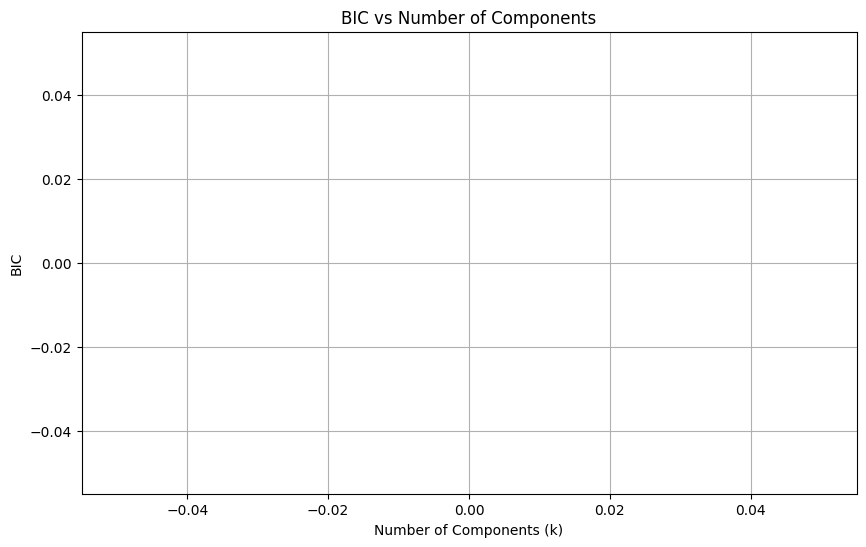

Optimal number of components: 2


In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import FastICA
from scipy.stats import expon
import matplotlib.pyplot as plt

def preprocess_data(X):
    """
    Preprocess the data matrix:
    1. Normalize each column to have a standard deviation of 1.
    2. Scale values between 0 and 1.
    """
    scaler = StandardScaler()  # Normalize to mean=0, std=1
    X_normalized = scaler.fit_transform(X)
    min_max_scaler = MinMaxScaler(feature_range=(0, 1))  # Scale to [0, 1]
    X_scaled = min_max_scaler.fit_transform(X_normalized)
    return X_scaled

def compute_bic(X, k_range=(2, 30), n_init=100):
    """
    Perform Bayesian ICA and calculate BIC for different numbers of components (k).
    Args:
    - X: Data matrix (observed mixtures).
    - k_range: Tuple (min_k, max_k) for the range of k values to evaluate.
    - n_init: Number of random initializations for ICA.
    
    Returns:
    - bic_values: List of BIC values for each k.
    """
    n_samples, n_features = X.shape
    bic_values = []

    for k in range(k_range[0], k_range[1] + 1):
        max_log_likelihood = -np.inf

        for _ in range(n_init):
            ica = FastICA(n_components=k, random_state=None, max_iter=1000)
            S_est = ica.fit_transform(X)  # Estimated sources
            A_est = ica.mixing_  # Estimated mixing matrix

            # Ensure non-negativity for A and positive values for S
            # A_est = np.abs(A_est)
            # S_est = np.abs(S_est)

            # Compute log-likelihood assuming exponential distribution for S
            log_likelihood = np.sum(expon.logpdf(S_est))

            # Keep the maximum log-likelihood over initializations
            if log_likelihood > max_log_likelihood:
                max_log_likelihood = log_likelihood

        # Compute BIC for the best log-likelihood
        bic = n_features * max_log_likelihood - 0.5 * n_samples * (k + 1) * np.log(n_features)
        bic_values.append(bic)

    return bic_values

def plot_bic(bic_values, k_range):
    """
    Plot BIC values as a function of k.
    """
    ks = range(k_range[0], k_range[1] + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(ks, bic_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Components (k)')
    plt.ylabel('BIC')
    plt.title('BIC vs Number of Components')
    plt.grid()
    plt.show()

# Example usage with synthetic data
if __name__ == "__main__":
    # Generate synthetic data (replace with actual data)
    np.random.seed(42)
    n_samples, n_features = 1000, 3
    n_true_sources = 4
    S_true = np.abs(np.random.exponential(scale=1.0, size=(n_samples, n_true_sources)))  # True sources
    A_true = np.abs(np.random.rand(n_features, n_true_sources))  # Mixing matrix
    X_mixed = np.dot(S_true, A_true.T)  # Observed mixtures

    # Preprocess the data
    X_preprocessed = preprocess_data(X_mixed)

    # Compute BIC for k = 2 to k = 30
    bic_values = compute_bic(X_preprocessed, k_range=(2, 30), n_init=100)

    # Plot the BIC values
    plot_bic(bic_values, k_range=(2, 30))

    # Find optimal k
    optimal_k = np.argmax(bic_values) + 2  # Offset by the starting k
    print(f"Optimal number of components: {optimal_k}")


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
A_true

array([[0.57199588, 0.80543233, 0.76016093, 0.1538999 ],
       [0.14924947, 0.26817437, 0.36107473, 0.40845558],
       [0.67969722, 0.05668043, 0.0346727 , 0.39191056]])

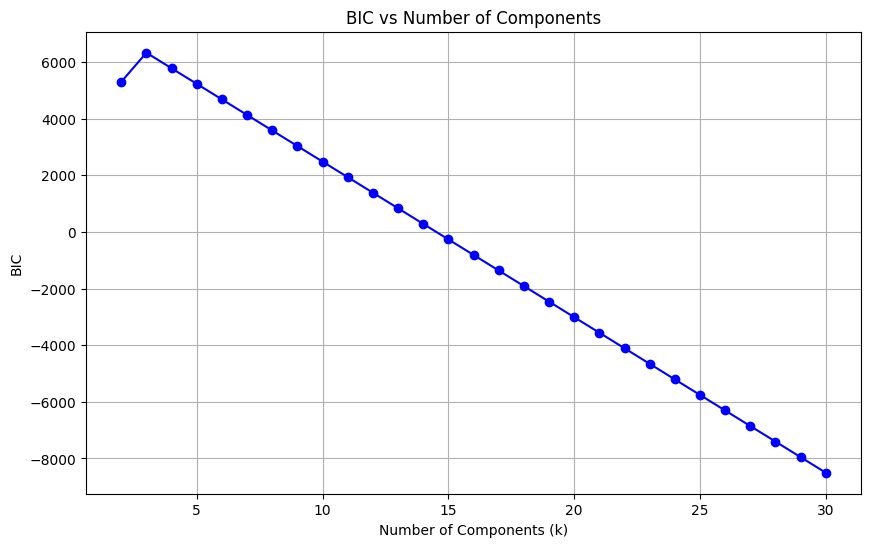

Optimal number of components: 3


In [43]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

def preprocess_data(X):
    """
    Preprocess the data matrix:
    1. Normalize each column to have a standard deviation of 1.
    2. Scale values between 0 and 1.
    """
    scaler = StandardScaler()  # Normalize to mean=0, std=1
    X_normalized = scaler.fit_transform(X)
    min_max_scaler = MinMaxScaler(feature_range=(0, 1))  # Scale to [0, 1]
    X_scaled = min_max_scaler.fit_transform(X_normalized)
    return X_scaled

def compute_log_likelihood(X, A, S, Sigma):
    """
    Compute the log likelihood based on the given formula:
    Args:
    - X: Observed data matrix.
    - A: Estimated mixing matrix.
    - S: Estimated source signals.
    - Sigma: Noise covariance matrix.

    Returns:
    - log_likelihood: Log likelihood of the data given the model.
    """
    N, _ = X.shape
    residual = X - np.dot(S, A.T)  # Compute residual (X - AS)
    Sigma_inv = np.linalg.inv(Sigma)  # Inverse of covariance matrix
    det_sig = np.linalg.det( 2 * np.pi * Sigma)
    term1 = -(N / 2) * np.log(det_sig)
    term2 = -0.5 * np.trace(residual @ Sigma_inv @ np.transpose(residual))
    log_likelihood = term1 + term2
    return log_likelihood

def compute_bic(X, k_range=(2, 30), n_init=100):
    """
    Perform Bayesian ICA and calculate BIC for different numbers of components (k).
    Args:
    - X: Data matrix (observed mixtures).
    - k_range: Tuple (min_k, max_k) for the range of k values to evaluate.
    - n_init: Number of random initializations for ICA.
    
    Returns:
    - bic_values: List of BIC values for each k.
    """
    n_samples, n_features = X.shape
    bic_values = []

    for k in range(k_range[0], k_range[1] + 1):
        max_log_likelihood = -np.inf

        for _ in range(n_init):
            ica = FastICA(n_components=k, random_state=None, max_iter=1000)
            S_est = ica.fit_transform(X)  # Estimated sources
            A_est = ica.mixing_  # Estimated mixing matrix
            
            # Ensure non-negativity for A
            A_est = np.abs(A_est)
            S_est = np.abs(S_est)

            # Compute covariance matrix Sigma (assuming isotropic noise)
            residual = X - np.dot(S_est, A_est.T)
            Sigma = np.cov(residual.T)  # Covariance of the residuals
            
            # Compute log-likelihood using the provided formula
            log_likelihood = compute_log_likelihood(X, A_est, S_est, Sigma)

            # Keep the maximum log-likelihood over initializations
            if log_likelihood > max_log_likelihood:
                max_log_likelihood = log_likelihood

        # Compute BIC for the best log-likelihood
        bic = n_features * max_log_likelihood - 0.5 * (n_samples*k + 1) * np.log(n_features)
        bic_values.append(bic)

    return bic_values

def plot_bic(bic_values, k_range):
    """
    Plot BIC values as a function of k.
    """
    ks = range(k_range[0], k_range[1] + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(ks, bic_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Components (k)')
    plt.ylabel('BIC')
    plt.title('BIC vs Number of Components')
    plt.grid()
    plt.show()

# Example usage with synthetic data
if __name__ == "__main__":
    # Generate synthetic data (replace with actual data)
    np.random.seed(42)
    n_samples, n_features = 1000, 3
    n_true_sources = 4
    S_true = np.abs(np.random.exponential(scale=1.0, size=(n_samples, n_true_sources)))  # True sources
    A_true = np.abs(np.random.rand(n_features, n_true_sources))  # Mixing matrix
    X_mixed = np.dot(S_true, A_true.T)  # Observed mixtures

    # Preprocess the data
    X_preprocessed = preprocess_data(X_mixed)

    # Compute BIC for k = 2 to k = 30
    bic_values = compute_bic(X_preprocessed, k_range=(2, 30), n_init=100)

    # Plot the BIC values
    plot_bic(bic_values, k_range=(2, 30))

    # Find optimal k
    optimal_k = np.argmax(bic_values) + 2  # Offset by the starting k
    print(f"Optimal number of components: {optimal_k}")


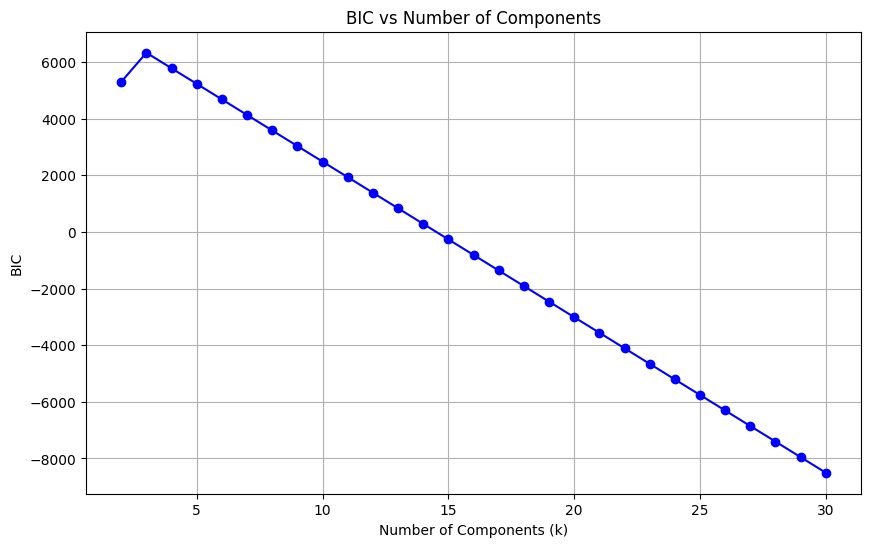

Optimal number of components: 3


In [52]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import FastICA, NMF
import matplotlib.pyplot as plt

def preprocess_data(X):
    scaler = StandardScaler()  
    X_normalized = scaler.fit_transform(X)
    min_max_scaler = MinMaxScaler(feature_range=(0, 1))  
    X_scaled = min_max_scaler.fit_transform(X_normalized)
    return X_scaled

def compute_log_likelihood(X, A, S, Sigma):
    N, _ = X.shape
    residual = X - np.dot(S, A.T)  
    Sigma_inv = np.linalg.inv(Sigma)  
    det_sig = np.linalg.det( 2 * np.pi * Sigma)
    term1 = -(N / 2) * np.log(det_sig)
    term2 = -0.5 * np.trace(residual @ Sigma_inv @ np.transpose(residual))
    log_likelihood = term1 + term2
    return log_likelihood

def compute_bic(X, k_range=(2, 30), n_init=100):
    n_samples, n_features = X.shape # n, p
    bic_values = []

    for k in range(k_range[0], k_range[1] + 1):
        max_log_likelihood = -np.inf

        for _ in range(n_init):
            ica = FastICA(n_components=k, random_state=None, max_iter=1000)
            S_est = ica.fit_transform(X)  
            A_est = ica.mixing_
            # print("S_est.size", S_est.shape, "A_est.size", A_est.shape)
            
            # This is the only place where I am unsure if we can use so. Bcz the papers utilize non-negative priors
            A_est = np.abs(A_est)
            S_est = np.abs(S_est)
            
            # ica = NMF(n_components=k, random_state=None, max_iter=1000)
            # S_est = ica.fit_transform(X)  
            # A_est = ica.components_ 
            # A_est = np.transpose(A_est)
            # print("S_est.size", S_est.shape, "A_est.size", A_est.shape)

            residual = X - np.dot(S_est, A_est.T)
            Sigma = np.cov(residual.T)  # This is also another issue as to whether this noise model is accurate or not
            
            log_likelihood = compute_log_likelihood(X, A_est, S_est, Sigma)

            if log_likelihood > max_log_likelihood:
                max_log_likelihood = log_likelihood

        bic = n_features * max_log_likelihood - 0.5 * (n_samples * k + 1) * np.log(n_features)
        bic_values.append(bic)

    return bic_values

def plot_bic(bic_values, k_range):
    ks = range(k_range[0], k_range[1] + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(ks, bic_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Components (k)')
    plt.ylabel('BIC')
    plt.title('BIC vs Number of Components')
    plt.grid()
    plt.show()

if __name__ == "__main__":
    np.random.seed(42)
    n_samples, n_features = 1000, 3
    n_true_sources = 4
    S_true = np.abs(np.random.exponential(scale=1.0, size=(n_samples, n_true_sources))) 
    A_true = np.abs(np.random.rand(n_features, n_true_sources)) 
    X_mixed = np.dot(S_true, A_true.T)  

    X_preprocessed = preprocess_data(X_mixed)
    bic_values = compute_bic(X_preprocessed, k_range=(2, 30), n_init=100)

    plot_bic(bic_values, k_range=(2, 30))

    optimal_k = np.argmax(bic_values) + 2 
    print(f"Optimal number of components: {optimal_k}")


In [7]:
import numpy as np
from sklearn.decomposition import SparseCoder
import matplotlib.pyplot as plt

# 1. Generate or Load a Dataset (e.g., natural images or synthetic data)
def generate_synthetic_data(num_samples=500, num_features=20, num_bases=30):
    """
    Generate synthetic data for sparse coding.
    num_samples: Number of data points.
    num_features: Dimensionality of each data point.
    num_bases: Number of basis functions (overcomplete basis).
    """
    np.random.seed(42)
    # Create a random overcomplete basis matrix A (M x L, M > L)
    basis = np.random.randn(num_bases, num_features)
    basis /= np.linalg.norm(basis, axis=1, keepdims=True)  # Normalize each basis vector

    # Generate sparse coefficients for each data sample
    coefficients = np.random.laplace(loc=0.0, scale=0.1, size=(num_samples, num_bases))
    print(coefficients)
    coefficients[np.random.rand(*coefficients.shape) > 0.2] = 0  # Make coefficients sparse
    print(coefficients)

    # Generate data samples: X = A^T * s + noise
    data = coefficients @ basis + 0.05 * np.random.randn(num_samples, num_features)
    return data, basis, coefficients

# Generate synthetic data
data, true_basis, true_coefficients = generate_synthetic_data()


[[-7.79788901e-02  5.87895917e-02  5.79948991e-02 ...  2.40073676e-02
  -1.64566504e-02  6.40343123e-02]
 [ 2.03052971e-01  1.90472903e-01 -1.03496983e-02 ... -1.04192773e-01
  -3.26979448e-04 -1.76915119e-02]
 [ 1.77014555e-01 -3.21876359e-02  1.75755203e-02 ... -1.26101357e-02
  -2.21237716e-02  1.27016277e-02]
 ...
 [ 1.96649633e-01 -1.44471776e-01 -7.67935449e-02 ...  1.23673123e-01
  -7.38665624e-01  1.44630848e-01]
 [-3.23298833e-01  7.24893946e-02 -3.23818364e-02 ...  4.05733328e-02
  -5.85138344e-03  8.17373949e-02]
 [ 3.31205836e-02 -2.11014231e-01 -1.65377037e-01 ...  1.58674952e-01
   3.20358072e-01  3.50010304e-02]]
[[ 0.          0.          0.0579949  ...  0.          0.
   0.06403431]
 [ 0.20305297  0.          0.         ... -0.10419277  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.01270163]
 ...
 [ 0.          0.         -0.07679354 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.    

In [8]:
# 2. Initialize Basis Functions
def initialize_basis(data, num_bases):
    """
    Initialize basis functions randomly from the data.
    """
    np.random.seed(42)
    indices = np.random.choice(data.shape[0], size=num_bases, replace=False)
    return data[indices]

Iteration 1/1000 - Reconstruction Error: 0.0040
Iteration 101/1000 - Reconstruction Error: 0.0034
Iteration 201/1000 - Reconstruction Error: 0.0032
Iteration 301/1000 - Reconstruction Error: 0.0032
Iteration 401/1000 - Reconstruction Error: 0.0031
Iteration 501/1000 - Reconstruction Error: 0.0031
Iteration 601/1000 - Reconstruction Error: 0.0030
Iteration 701/1000 - Reconstruction Error: 0.0030
Iteration 801/1000 - Reconstruction Error: 0.0030
Iteration 901/1000 - Reconstruction Error: 0.0030
Iteration 1000/1000 - Reconstruction Error: 0.0030


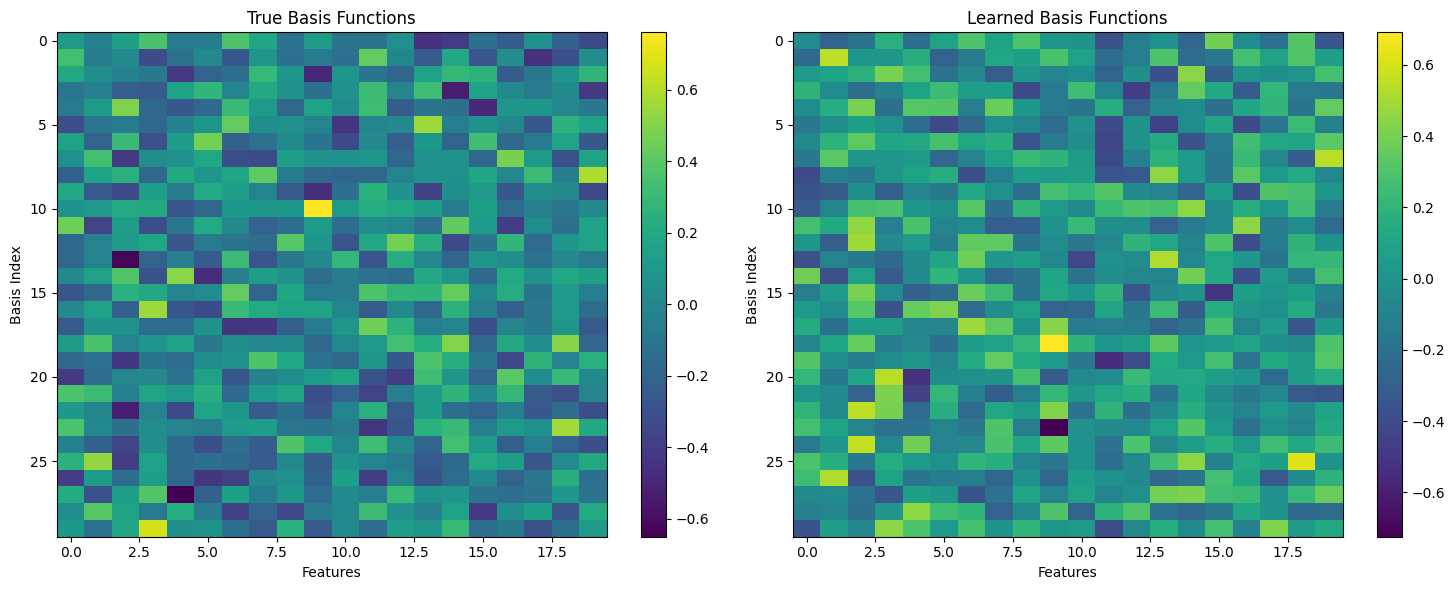

In [9]:
# 3. Sparse Coding with Iterative Optimization
class SparseCoding:
    def __init__(self, data, num_bases, sparsity_weight=1.0, learning_rate=0.01, max_iter=300):
        self.data = data
        self.num_bases = num_bases
        self.sparsity_weight = sparsity_weight
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.num_features = data.shape[1]

        # Initialize basis functions randomly
        self.basis = initialize_basis(data, num_bases)
        self.basis /= np.linalg.norm(self.basis, axis=1, keepdims=True)

    def sparse_coding_step(self, x):
        """
        Perform sparse coding (inner optimization) for a single data sample.
        """
        coder = SparseCoder(dictionary=self.basis, transform_algorithm="lasso_lars", transform_alpha=self.sparsity_weight)
        coefficients = coder.transform(x.reshape(1, -1))
        return coefficients[0]

    def update_basis(self, x, coefficients):
        """
        Update the basis functions (outer optimization).
        """
        reconstruction = coefficients @ self.basis
        residual = x - reconstruction

        # Update each basis function
        for i in range(self.num_bases):
            gradient = residual * coefficients[i]
            self.basis[i] += self.learning_rate * gradient
            self.basis[i] /= np.linalg.norm(self.basis[i])  # Re-normalize

    def fit(self):
        """
        Train the model using sparse coding and basis optimization.
        """
        for iteration in range(self.max_iter):
            for x in self.data:
                # Step 1: Solve for sparse coefficients
                coefficients = self.sparse_coding_step(x)

                # Step 2: Update basis functions
                self.update_basis(x, coefficients)

            # Print progress
            if iteration % 100 == 0 or iteration == self.max_iter - 1:
                reconstruction_error = np.mean((self.data - self.reconstruct()) ** 2)
                print(f"Iteration {iteration + 1}/{self.max_iter} - Reconstruction Error: {reconstruction_error:.4f}")

    def reconstruct(self):
        """
        Reconstruct the data using the current basis and sparse coefficients.
        """
        coder = SparseCoder(dictionary=self.basis, transform_algorithm="lasso_lars", transform_alpha=self.sparsity_weight)
        coefficients = coder.transform(self.data)
        return coefficients @ self.basis

# 4. Run Sparse Coding on the Dataset
num_bases = 30
model = SparseCoding(data, num_bases, sparsity_weight=0.1, learning_rate=0.01, max_iter=1000)
model.fit()

# 5. Visualize the Results
# Plot the true and learned basis functions (if the data is 2D or interpretable)
plt.figure(figsize=(15, 6))

# Plot True Basis
plt.subplot(1, 2, 1)
plt.title("True Basis Functions")
plt.imshow(true_basis, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel("Features")
plt.ylabel("Basis Index")

# Plot Learned Basis
plt.subplot(1, 2, 2)
plt.title("Learned Basis Functions")
plt.imshow(model.basis, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel("Features")
plt.ylabel("Basis Index")

plt.tight_layout()
plt.show()

In [12]:
model.basis.shape

(30, 20)